In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler #how to install : pip install scikit-learn

In [224]:
# !pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [8]:
df = pd.read_pickle('./total_df.pkl')
df.head()

,일시,측정소명,풍향,풍속,온도,습도,강수량,PM
1,2021-01-01 01:00:00,강남,327.0,1.3,-7.0,55.0,0.0,13.0
2,2021-01-01 02:00:00,강남,309.0,1.1,-6.8,55.0,0.0,13.0
3,2021-01-01 03:00:00,강남,45.0,0.9,-7.0,57.0,0.0,12.0
4,2021-01-01 04:00:00,강남,304.0,0.6,-7.5,57.0,0.0,13.0
5,2021-01-01 05:00:00,강남,82.0,0.8,-7.7,60.0,0.0,14.0


In [213]:
pvt22 = df.pivot(index = ['일시'], columns = '측정소명', values = 'PM')
pvt22.head()
pvt22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24071 entries, 2021-01-01 01:00:00 to 2023-09-30 23:00:00
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   강남      24071 non-null  float64
 1   강동      24071 non-null  float64
 2   강북      24071 non-null  float64
 3   강서      24071 non-null  float64
 4   관악      24071 non-null  float64
 5   광진      24071 non-null  float64
 6   구로      24071 non-null  float64
 7   금천      24071 non-null  float64
 8   노원      24071 non-null  float64
 9   도봉      24071 non-null  float64
 10  동대문     24071 non-null  float64
 11  마포      24071 non-null  float64
 12  서대문     24069 non-null  float64
 13  서초      24071 non-null  float64
 14  성동      24071 non-null  float64
 15  성북      24070 non-null  float64
 16  송파      23983 non-null  float64
 17  양천      24071 non-null  float64
 18  용산      24071 non-null  float64
 19  은평      24071 non-null  float64
 20  중구      24071 non-null  float64
 21  중랑      

In [211]:
df_group1 = pvt22[['양천','강서','구로','마포']]
df_group1.info()
# df_group1[:].values

<class 'pandas.core.frame.DataFrame'>
Index: 24071 entries, 2021-01-01 01:00:00 to 2023-09-30 23:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   양천      24071 non-null  float64
 1   강서      24071 non-null  float64
 2   구로      24071 non-null  float64
 3   마포      24071 non-null  float64
dtypes: float64(4)
memory usage: 940.3+ KB


In [79]:
df_group1

측정소명,양천,강서,구로,마포
일시,,,,
2021-01-01 01:00:00,11.0,11.0,8.0,8.0
2021-01-01 02:00:00,12.0,12.0,6.0,10.0
2021-01-01 03:00:00,13.0,14.0,6.0,10.0
2021-01-01 04:00:00,12.0,12.0,7.0,10.0
2021-01-01 05:00:00,13.0,12.0,12.0,10.0
...,...,...,...,...
2023-09-30 19:00:00,10.0,12.0,5.0,16.0
2023-09-30 20:00:00,10.0,12.0,5.0,16.0
2023-09-30 21:00:00,10.0,12.0,5.0,16.0


In [320]:
df_temp_onlypmvalues = df_group1[:].values
df_temp_onlypmvalues

array([[11., 11.,  8.,  8.],
       [12., 12.,  6., 10.],
       [13., 14.,  6., 10.],
       ...,
       [10., 12.,  5., 16.],
       [10., 12.,  5., 16.],
       [10., 12.,  5., 16.]])

In [11]:
df_group1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24071 entries, 2021-01-01 01:00:00 to 2023-09-30 23:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   양천      24071 non-null  float64
 1   강서      24071 non-null  float64
 2   구로      24071 non-null  float64
 3   마포      24071 non-null  float64
dtypes: float64(4)
memory usage: 940.3+ KB


In [78]:
# df_temp = df_group1.head(100)
df_temp = df_group1.head()
df_temp

측정소명,양천,강서,구로,마포
일시,,,,
2021-01-01 01:00:00,11.0,11.0,8.0,8.0
2021-01-01 02:00:00,12.0,12.0,6.0,10.0
2021-01-01 03:00:00,13.0,14.0,6.0,10.0
2021-01-01 04:00:00,12.0,12.0,7.0,10.0
2021-01-01 05:00:00,13.0,12.0,12.0,10.0


In [210]:
df_temp.shift(1)

측정소명,양천,강서,구로,마포
일시,,,,
2021-01-01 01:00:00,NaN,NaN,NaN,NaN
2021-01-01 02:00:00,11.0,11.0,8.0,8.0
2021-01-01 03:00:00,12.0,12.0,6.0,10.0
2021-01-01 04:00:00,13.0,14.0,6.0,10.0
2021-01-01 05:00:00,12.0,12.0,7.0,10.0


In [65]:
df_temp

<bound method NDFrame.head of 측정소명                   양천    강서    구로    마포
일시                                         
2021-01-01 01:00:00  11.0  11.0   8.0   8.0
2021-01-01 02:00:00  12.0  12.0   6.0  10.0
2021-01-01 03:00:00  13.0  14.0   6.0  10.0
2021-01-01 04:00:00  12.0  12.0   7.0  10.0
2021-01-01 05:00:00  13.0  12.0  12.0  10.0
...                   ...   ...   ...   ...
2023-09-30 19:00:00  10.0  12.0   5.0  16.0
2023-09-30 20:00:00  10.0  12.0   5.0  16.0
2023-09-30 21:00:00  10.0  12.0   5.0  16.0
2023-09-30 22:00:00  10.0  12.0   5.0  16.0
2023-09-30 23:00:00  10.0  12.0   5.0  16.0

[24071 rows x 4 columns]>

In [59]:
# df_temp1 = np.array(df_temp)

### train data 준비하기 ###

### 데이터의 차원(dimentionality) 저주를 방지하기 위해, scaling 수행 ####

### scaling x_data, y_data 각각 수행 ###

In [321]:
# 전체데이터를 train으로 사용하는 경우
x_data, y_data = df_temp_onlypmvalues[:, 1:], df_temp_onlypmvalues[:, 0]
print(x_data.shape)
print(y_data.shape)
x_data

(24071, 3)
(24071,)


array([[11.,  8.,  8.],
       [12.,  6., 10.],
       [14.,  6., 10.],
       ...,
       [12.,  5., 16.],
       [12.,  5., 16.],
       [12.,  5., 16.]])

In [322]:
scaler_x = MinMaxScaler()
x_data = scaler_x.fit_transform(x_data)
print(x_data.shape)

y_data = y_data.reshape(len(y_data),1)
scaler_y = MinMaxScaler()
y_data = scaler_y.fit_transform(y_data)
print(y_data.shape)

(24071, 3)
(24071, 1)


In [175]:
# (분석시간을 줄이기 위해)일부데이터를 train으로 사용하는 경우
# cnt_sampledata = 100
# x_data, y_data = df_temp_onlypmvalues[:cnt_sampledata, 1:], df_temp_onlypmvalues[:cnt_sampledata, 0]

In [ ]:
#### LSTM layer에 입력하기 위해 3차원 데이터로 만들어준다 : reshape(datasize, time steps, features)
#### (tip)keras에서 제공하는 RNN(Recurrent Neural Network) layer : SimpleRNN, GRU, LSTM 등
#### LSTM : Long Short-Term Memory, 긴 sequence를 기억한다.

In [271]:
## 2->3차원으로 변경한다.
# x_data = x_data.reshape((x_data.shape[0]), x_data.shape[1],1) ### 2->3차원으로 변경한다.
print(x_data.shape)
print(y_data.shape)

(24071, 3)
(24071,)


In [323]:
#(x)강서,구로,마포 pm
x_data

array([[0.04347826, 0.03211009, 0.04964539],
       [0.04782609, 0.02293578, 0.06382979],
       [0.05652174, 0.02293578, 0.06382979],
       ...,
       [0.04782609, 0.01834862, 0.10638298],
       [0.04782609, 0.01834862, 0.10638298],
       [0.04782609, 0.01834862, 0.10638298]])

In [324]:
#(y)양천
y_data

array([[0.06493506],
       [0.07142857],
       [0.07792208],
       ...,
       [0.05844156],
       [0.05844156],
       [0.05844156]])

#### 위까지 전처리 완료 ####

### LSTM(RNN) MODEL 생성 ###

In [325]:
from keras.layers import Embedding, Dense, LSTM, Dropout, Flatten, \
TimeDistributed, Conv1D, MaxPooling1D

from keras.models import Model
from keras import Input

from keras.models import Sequential
from sklearn.model_selection import train_test_split

### x_data, y_data를 분리한다 ###
### 1) 학습에 사용될 데이터 80% : train(x,y), test(x,y)
### 2) 예측(predict)에 사용될 데이터 20% : predict(x,y)

In [330]:
## data 분류(3가지로 분류) : training(x_train, y_train), test(x_test, y_test), predict(x_predict, y_predict)
## 1)예측용 dataset -> 2)training + test
## x_train + y_train + x_predict = 24,071
x_train, x_predict, y_train, y_predict = train_test_split(x_data, y_data, test_size=0.1, shuffle=False) #시각화를 위해 shuffle=False 옵션 사용
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, shuffle=False) #시각화를 위해 shuffle=False 옵션 사용

x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_predict.shape, y_predict.shape

((15164, 3), (15164, 1), (6499, 3), (6499, 1), (2408, 3), (2408, 1))

In [ ]:
## data 분류(2가지로 분류) : training, test
# x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, shuffle=False) #시각화를 위해 shuffle=False 옵션 사용
# x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [331]:
### Model 구성하기 ####
#units : dimensionality of the output space, layer안에 있는 node의 수
#input_shape(time_steps/column/inputsize, inputdim/features/몇개씩잘라작업하는지)
#return_sequences : 시퀀스 마다 출력 여부(False : 마지막, True : 모든 sequence 에서 출력
#return_sequences=True 사용하는 경우
#-1)LSTM 레이어를 여러 개로 쌓아올릴 때 2)이전 layer의 값이 다음 layer로 들어가도록 하기 위해
#stateful : 학습 생플의 가장 마지막 상태가 다음 샘플 학습 시에 입력으로 전달되는지 여부를 정하는 것 
#=>각 샘플별 도출된 가중치가 다음 샘플 학습시 초기 상태의 입력 값으로 입력
# cc_time_steps = 3 #과거 몇개의 데이터를 볼 것인지 or 몇개의 측정소를 볼 것인가
cnt_probes = 3 #참조하는 인근측정소 수
cnt_targetProbe = 1 #예측하고자 하는 측정소 수
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(cnt_probes, cnt_targetProbe), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
# model.add(LSTM(32, activation='relu', batch_input_shape=(cc_time_steps, 1), stateful=True))
# model.add(Dense(32, activation='relu'))
model.add(Dense(16))
model.add(Dense(1))
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 3, 32)             4352      
                                                                 
 lstm_34 (LSTM)              (None, 32)                8320      
                                                                 
 dense_48 (Dense)            (None, 16)                528       
                                                                 
 dense_49 (Dense)            (None, 1)                 17        
                                                                 
Total params: 13217 (51.63 KB)
Trainable params: 13217 (51.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [125]:
# seq_length = 3
# model = Sequential()
# model.add(LSTM(256), kernel_initializer='he_mormal'
#           ,activation='relu', input_shape=(seq_length, 1))
# model.add(Dense(64, kernel_initializer='he_normal', activation='relu'))
# model.add(Dense(1))
# model.compile(loss='mse', optimizer='adam')

In [332]:
print('x_train.shape:',x_train.shape)
print('y_train.shape:',y_train.shape)

x_train.shape: (15164, 3)
y_train.shape: (15164, 1)


Epoch 1/2


474/474 [==============================] - 53s 49ms/step - loss: 6.6339e-04 - mse: 6.6339e-04 - mae: 0.0186 - val_loss: 7.9379e-04 - val_mse: 7.9379e-04 - val_mae: 0.0196
Epoch 2/2
474/474 [==============================] - 21s 45ms/step - loss: 6.5413e-04 - mse: 6.5413e-04 - mae: 0.0185 - val_loss: 7.4362e-04 - val_mse: 7.4362e-04 - val_mae: 0.0193


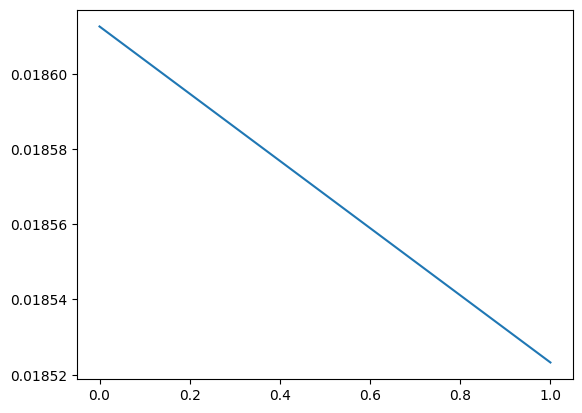

In [334]:
### Model compile/학습 실행하기 ####
# compile(model 학습방식 설정) : model의 손실 함수(loss function), 최적화 알고리즘(optimizer), 평가 지표(metrics) 등 설정과정
# metric : A metric is a function that is used to judge the performance of your model
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
# epochs : 모델을 학습시킬 반복 횟수(1회 : 모든 x, y 데이터에 대한 학습을 완료 했을때, 2회 : 모든데이터를 1번 학습하고 1번더 학습)

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

history = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test)) #batch_size=1(default : 32)
plt.plot(history.history['mae'])
plt.show()

### Model로 예측값 얻기 ####

### 예측된 데이터(y_pred) 구하기 => transform(scaling)된 data를 원래data로 되돌리기 : inverse_transform

In [350]:
print(x_test.shape)

y_pred = model.predict(x_test)
y_pred

print(y_pred.shape)

y_predOrigin = scaler_y.inverse_transform(y_pred)
y_testOrigin = scaler_y.inverse_transform(y_test)
# # print(y_predict[0][0])

error = y_testOrigin - y_predOrigin # (모두 원복한)실제값 x_test로 예측한 데이터 y_pred와, 실제값 x_test에 대응한 실제값 y_test의 오차율 비교 
abs(error).mean()

(6499, 3)


204/204 [==============================] - 3s 14ms/step
(6499, 1)


2.9676214472800977

In [349]:
# x_test = np.array([
#         [44, 49, 50]
# ])
# print(x_test.shape)

# x_test = scaler.transform(x_test)
# x_test = x_test.reshape((1,3))
# # print(x_test.shape)
# y_predict = model.predict(x_test)
# y_predict = scaler.inverse_transform(y_predict)
# print(y_predict)

In [ ]:
#### 연습페이지(아래부터) #####

In [128]:
import numpy as np
x=np.array([[1,2,3],[2,3,4],[3,4,5],[4,5,6]])
y=np.array([4,5,6,7])

print('x.shape:',x.shape)# (4,3)
print('y.shape:',y.shape)# (4,)

x.shape: (4, 3)
y.shape: (4,)


In [129]:
x = x.reshape((x.shape[0], x.shape[1],1))
x

array([[[1],
        [2],
        [3]],

       [[2],
        [3],
        [4]],

       [[3],
        [4],
        [5]],

       [[4],
        [5],
        [6]]])